In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

from glob import glob
import pandas as pd
from astropy.stats import sigma_clip

In [2]:
#did_files = glob('/home/phys/astronomy/rri38/test/cal/A*-Didymos*')
path = '/home/phys/astro8/MJArchive/MOA/ALERT/'

did_files = glob(path + '*Didymos220811*-3.fit.gz')
jd = fits.open(did_files[0])[0].header['jdstart']
header = fits.open(did_files[0])[0].header

In [3]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =               32768. / REAL = FILE * BSCALE + BZERO                   
OBSTEL  = '  MOA-II telescope' / Observing telescope                            
CAMERA  = '          MOA-cam3' / Observing camera                               
FNUM    = '             f2.91' / F number                                       
OBSVAT  = '        Mount Joh

In [8]:
d_cat = pd.read_csv('../pouakai/cal_lists/dark_list.csv')
f_cat = pd.read_csv('../pouakai/cal_lists/flat_list.csv')

In [13]:
dind = (d_cat['chip'].values == 3) & (d_cat['exptime'].values == 120) & (abs(d_cat['jd'].values - jd) <= 100)
dt = d_cat.iloc[dind]
dind = (d_cat['chip'].values == 3) & (d_cat['exptime'].values == 121) & (abs(d_cat['jd'].values - jd) <= 100)
df = d_cat.iloc[dind]

In [14]:
tmp = []
for file in df['filename']:
    im = fits.open(file)[0].data
    tmp += [im]
fdarks = np.array(tmp)
fdark = np.nanmedian(fdarks,axis=0)

In [32]:
rfind = (f_cat['chip'].values == 3) & (f_cat['note'].values == 'good') & (f_cat['band'].values == '                 R')  & (f_cat['exptime'].values == 121) & (abs(f_cat['jd'].values - jd) <= 60)
rflats_file = f_cat.iloc[rfind]
vfind = (f_cat['chip'].values == 3) & (f_cat['note'].values == 'good') & (f_cat['band'].values == '                 V')  & (f_cat['exptime'].values == 121) & (abs(f_cat['jd'].values - jd) <= 60)
vflats_file = f_cat.iloc[vfind]

In [33]:
tmp = []
for file in rflats_file['filename']:
    im = fits.open(file)[0].data
    im = im - fdark
    tmp += [im/np.nanmedian(im)]
flats = np.array(tmp)
Rflat = np.nanmedian(flats,axis=0)


tmp = []
for file in vflats_file['filename']:
    im = fits.open(file)[0].data
    im = im - fdark
    tmp += [im/np.nanmedian(im)]
flats = np.array(tmp)
Vflat = np.nanmedian(flats,axis=0)


In [39]:
im = fits.open(did_files[0])[0].data / Rflat
i = fits.open(did_files[0])[0].data

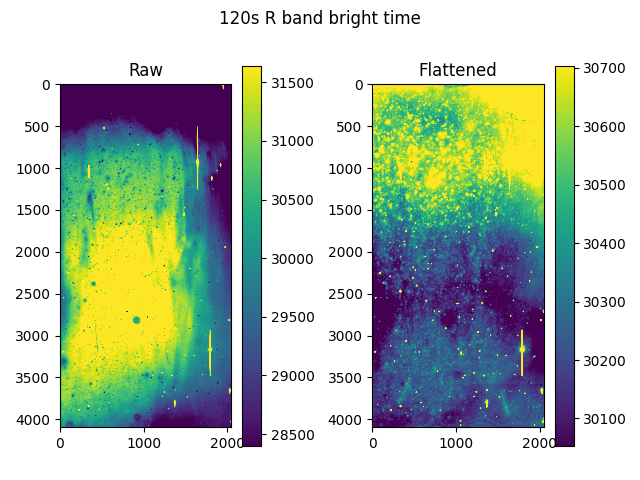

In [46]:
plt.figure()
plt.suptitle('120s R band bright time')
plt.subplot(121)
plt.title('Raw')
plt.imshow(i,vmin=np.percentile(i,16),vmax=np.percentile(i,84))
plt.colorbar()
plt.subplot(122)
plt.title('Flattened')
plt.imshow(im,vmin=np.percentile(im,16),vmax=np.percentile(im,84))
plt.colorbar()
plt.tight_layout()
plt.savefig('120s_R_didymos.png')

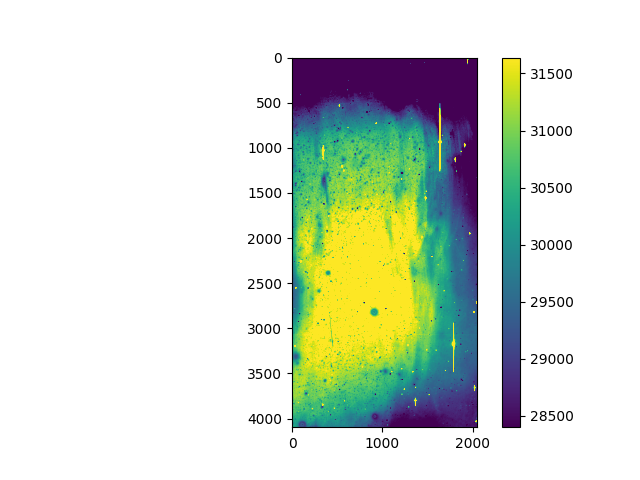

In [42]:
plt.figure()
plt.imshow(i,vmin=np.percentile(i,16),vmax=np.percentile(i,84))
plt.colorbar()

In [49]:
from astropy.coordinates import SkyCoord
import astropy.units as u

In [55]:
moon = SkyCoord(20*15,-24+(37/60),unit='deg')
didymos = SkyCoord(23*15, -23,unit='deg')

In [56]:
moon.separation(didymos)

<Angle 41.19164102 deg>